In [1]:
import pandas as pd
df = pd.read_csv("/home/austin/20220831_final_results.csv")
df = df.set_axis(['tool', 'program_set', 'seed', 'campaign', 'violation', 'direct', 'config1', 'config2', 'partial_order','program'], axis=1)
df = df[(df['seed'] == "NONE") | (df['seed'] == "18331")]
(df := df[~(df.partial_order.str.contains('NO_STRING_CONSTANT'))])
((filtered := df[df.tool == 'doop'].partial_order.str.split('/', expand=True))[1] + "/" + filtered[3]).unique()

array(['1-object-1-type-sensitive+heap/1-type-sensitive+heap',
       '1-object-1-type-sensitive+heap/1-object-sensitive+heap',
       '1-call-site-sensitive+heap/1-call-site-sensitive',
       '1-object-sensitive/1-type-sensitive',
       '2-object-sensitive+2-heap/2-object-sensitive+heap',
       '3-object-sensitive+3-heap/2-object-sensitive+2-heap',
       '3-object-sensitive+3-heap/3-type-sensitive+3-heap',
       '1-type-sensitive+heap/1-type-sensitive',
       '2-object-sensitive+heap/1-object-1-type-sensitive+heap',
       '2-object-sensitive+heap/2-type-sensitive+heap',
       '1-object-sensitive+heap/1-object-sensitive',
       '1-object-sensitive+heap/1-type-sensitive+heap'], dtype=object)

In [2]:
transform = df.replace({'cats-microbenchmark':'microbenchmark','droidbench':'microbenchmark','dacapo-2006':'real-world','fossdroid':'real-world'})
pvt = pd.pivot_table(transform, index='program_set', values='partial_order', columns=['tool'], aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,doop,flowdroid,soot,wala,All
program_set,,,,,
microbenchmark,NaN,28.0,3.0,NaN,31
real-world,12.0,9.0,18.0,9.0,48
All,12.0,35.0,18.0,9.0,74


In [3]:
only_default = df[(df.seed == 'NONE') & ~(df.campaign.str.startswith('full'))]
transform = df.replace({'cats-microbenchmark':'microbenchmark','droidbench':'microbenchmark','dacapo-2006':'real-world','fossdroid':'real-world'})
transform = transform[(transform.seed != 'NONE')]
transform = transform[~transform.campaign.str.startswith('full')]
# transform = transform[~transform.partial_order.isin(only_default.partial_order)]
pvt = pd.pivot_table(transform, index='program_set', values='partial_order', columns=['tool'], aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,flowdroid,wala,All
program_set,,,
microbenchmark,2.0,NaN,2
real-world,5.0,3.0,8
All,6.0,3.0,9


In [4]:
df[(df.tool == 'wala') & (df.program_set == 'dacapo-2006')].partial_order.unique()

array(['cgalgo/NOBJ/MPT/ZEROONE_CFA/ZEROONE_CFA/MST/NOBJ',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW_TO_CASTS_NO_METHOD_INVOKE/NO_FLOW_TO_CASTS_NO_METHOD_INVOKE/MPT/NO_FLOW_TO_CASTS',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/STRING_ONLY/STRING_ONLY/MPT/NO_FLOW_TO_CASTS',
       'cgalgo/NCFA/MPT/ZEROONE_CFA/ZEROONE_CFA/MST/NCFA',
       'reflectionSetting/FULL/MST/NO_METHOD_INVOKE/NO_METHOD_INVOKE/MPT/FULL',
       'reflectionSetting/FULL/MST/APPLICATION_GET_METHOD/APPLICATION_GET_METHOD/MPT/FULL',
       'reflectionSetting/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/MST/STRING_ONLY/STRING_ONLY/MPT/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD',
       'reflectionSetting/STRING_ONLY/MST/NONE/NONE/MPT/STRING_ONLY',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/MPT/NO_FLOW_TO_CASTS'],
      dtype=object)

In [5]:
transform[(transform['seed'] == 'NONE') & (transform.campaign.str.startswith('full'))]

,tool,program_set,seed,campaign,violation,direct,config1,config2,partial_order,program


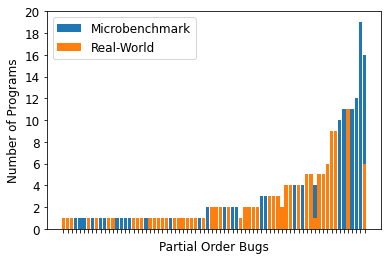

In [97]:
import matplotlib.pyplot as plt
plt.close("all")

plt.rc("font", size=12)

fig, ax = plt.subplots()

to_plot = df[["partial_order","program_set"]]
to_plot = to_plot.replace({"cats-microbenchmark":"microbenchmark","fossdroid":"real_world","droidbench":"microbenchmark","dacapo-2006":"real_world"})
pvt = to_plot.pivot_table(index="partial_order", columns="program_set", values="partial_order", aggfunc=lambda x: len(x)).fillna(0)
pvt['total'] = pvt.microbenchmark + pvt.real_world
pvt = pvt.sort_values('total')
ax.bar(pvt.index, pvt.microbenchmark, label="Microbenchmark")
ax.bar(pvt.index, pvt['real_world'], label="Real-World")

ax.set_xticklabels("")
ax.set_yticks(range(0, 22, 2))
ax.set_xlabel("Partial Order Bugs")
ax.set_ylabel("Number of Programs")
ax.legend()
plt.show()
fig.savefig("/home/austin/git/ECSTATIC_paper/figs/programs_vs_partial_orders.pdf", format='pdf')